In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [230]:
data=pd.read_csv('credit_fraud.csv')

In [231]:
data.head(9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [233]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [234]:
# checking the number of missing value in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [235]:
#checking distrinution of fraud and legit transaction
data.Class.value_counts()


0    284315
1       492
Name: Class, dtype: int64

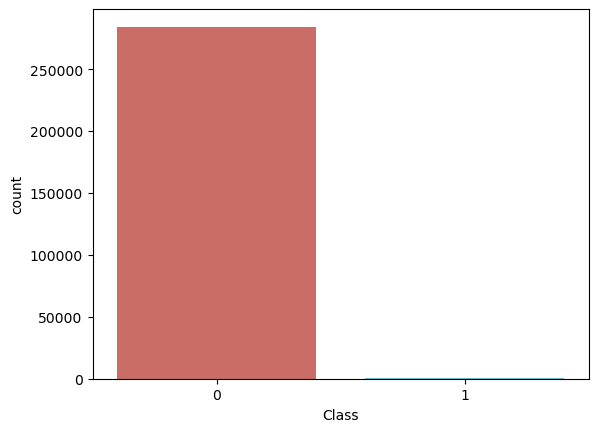

In [236]:
sns.countplot(x='Class',data=data,palette='hls')
plt.show()

# data is highly unbalanced so we cannot feed this data to model 
# sperating the data for analysis

In [237]:
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [238]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [239]:
#statical measures of the data
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

fraud.Amount.describe()

In [240]:
#comparing both the legit and fraud transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#undersampling
#building dataset contianing similar distribution of normal transaction and 
#frad transaction
#number of fraud transaction-492 and legit transaction are 284315
#we will join 492 transaction of boths in this the ratio will be one

In [241]:
legit_sample=legit.sample(n=492)

# concatenating two data frames ,below axis zero is for row and 1 for column

In [242]:
new_data_set=pd.concat([legit_sample,fraud],axis=0)

In [243]:
new_data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57900,48131.0,0.817495,-1.547456,0.481926,-0.653222,-1.265180,0.456649,-0.884552,0.313354,-0.641144,...,0.532092,0.933641,-0.219417,-0.275384,0.145632,-0.082832,0.003955,0.042257,239.00,0
139052,82984.0,-0.700103,1.224625,1.342028,1.162684,-0.252088,-0.490288,0.167759,0.443837,-1.199068,...,0.180650,0.366629,-0.066725,0.544863,-0.317194,-0.383184,0.045020,0.065980,4.50,0
251830,155517.0,-3.420871,-1.077585,-1.157298,-0.220308,2.116500,-1.177907,1.577284,-1.884622,2.052569,...,-0.828788,-0.514697,-0.252675,0.568601,-1.258924,-0.341029,-3.207718,0.124325,1.29,0
68449,52994.0,0.748347,-0.674003,1.194426,0.912450,-0.471938,2.038013,-1.141235,0.892537,0.627777,...,0.465913,1.240207,-0.022937,-1.043178,-0.057341,-0.148440,0.117470,0.032196,103.40,0
90931,63239.0,-3.877045,2.269464,-0.032080,-0.319616,0.662678,1.439555,-3.115945,-8.354821,0.840628,...,8.165033,-2.793291,0.531061,-0.477828,-0.063762,0.326824,0.843577,0.094142,12.31,0


In [244]:
new_data_set.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


<AxesSubplot:xlabel='Class', ylabel='count'>

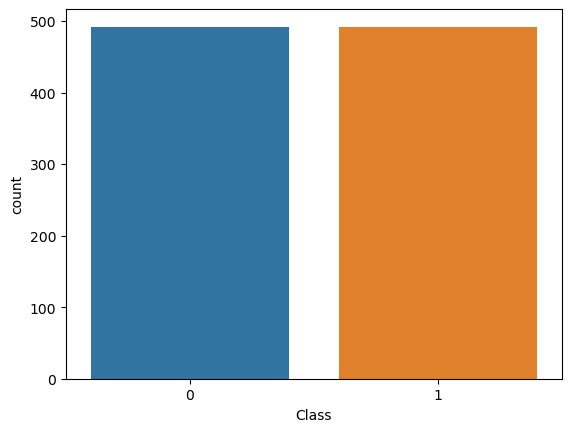

In [245]:
sns.countplot(x='Class',data=new_data_set)

In [246]:
new_data_set['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [247]:
new_data_set.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94569.701220,0.025767,-0.026321,0.064226,0.018068,-0.005304,0.034866,0.019066,-0.008214,-0.013128,...,-0.010155,0.044641,-0.028065,0.025691,-0.046964,0.006133,-0.010201,-0.001280,-0.004891,93.828659
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# we can compare the mean values of all the columns and conclude that the 
# nature of dataset does not change much so we got a good sample

#spliting the data into features and target

In [248]:
X=new_data_set.drop(columns='Class',axis=1)

In [249]:
Y=new_data_set['Class']

In [250]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
57900,48131.0,0.817495,-1.547456,0.481926,-0.653222,-1.265180,0.456649,-0.884552,0.313354,-0.641144,...,0.412185,0.532092,0.933641,-0.219417,-0.275384,0.145632,-0.082832,0.003955,0.042257,239.00
139052,82984.0,-0.700103,1.224625,1.342028,1.162684,-0.252088,-0.490288,0.167759,0.443837,-1.199068,...,-0.016510,0.180650,0.366629,-0.066725,0.544863,-0.317194,-0.383184,0.045020,0.065980,4.50
251830,155517.0,-3.420871,-1.077585,-1.157298,-0.220308,2.116500,-1.177907,1.577284,-1.884622,2.052569,...,-1.572473,-0.828788,-0.514697,-0.252675,0.568601,-1.258924,-0.341029,-3.207718,0.124325,1.29
68449,52994.0,0.748347,-0.674003,1.194426,0.912450,-0.471938,2.038013,-1.141235,0.892537,0.627777,...,-0.126089,0.465913,1.240207,-0.022937,-1.043178,-0.057341,-0.148440,0.117470,0.032196,103.40
90931,63239.0,-3.877045,2.269464,-0.032080,-0.319616,0.662678,1.439555,-3.115945,-8.354821,0.840628,...,-2.623144,8.165033,-2.793291,0.531061,-0.477828,-0.063762,0.326824,0.843577,0.094142,12.31


In [251]:
Y.tail()

279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, dtype: int64

In [252]:
Y.head()

57900     0
139052    0
251830    0
68449     0
90931     0
Name: Class, dtype: int64

#split the data into traing and testing data using train_test_split

In [253]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=4)

In [254]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [255]:
model=LogisticRegression()

# training the model with training data

In [256]:
model.fit(X_train,Y_train)

LogisticRegression()

# Accuracy score on training data first

In [257]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [258]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9161372299872935


# Accuracy on Test Data

In [259]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [260]:
print('Accuracy on test datat:',test_data_accuracy)

Accuracy on test datat: 0.9086294416243654


# we got almost same accuracy score for both training and testing data set mean model is neither overfit nor underfit